The best sollution to overfitting is having more training data, then we can use techniques like regularization.

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.10.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

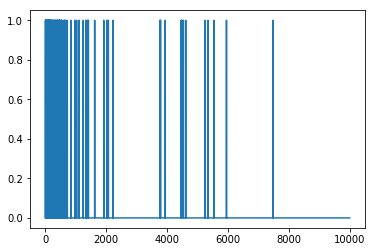

In [3]:
plt.plot(train_data[0])


In [4]:
baseline_model = keras.Sequential([
    # `input_shape` is only required here so that `.summary` works.
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5088 - acc: 0.7889 - binary_crossentropy: 0.5088 - val_loss: 0.3598 - val_acc: 0.8678 - val_binary_crossentropy: 0.3598
Epoch 2/20
 - 4s - loss: 0.2660 - acc: 0.9062 - binary_crossentropy: 0.2660 - val_loss: 0.2882 - val_acc: 0.8868 - val_binary_crossentropy: 0.2882
Epoch 3/20
 - 4s - loss: 0.1925 - acc: 0.9324 - binary_crossentropy: 0.1925 - val_loss: 0.2865 - val_acc: 0.8862 - val_binary_crossentropy: 0.2865
Epoch 4/20
 - 4s - loss: 0.1520 - acc: 0.9484 - binary_crossentropy: 0.1520 - val_loss: 0.3078 - val_acc: 0.8801 - val_binary_crossentropy: 0.3078
Epoch 5/20
 - 4s - loss: 0.1247 - acc: 0.9584 - binary_crossentropy: 0.1247 - val_loss: 0.3310 - val_acc: 0.8744 - val_binary_crossentropy: 0.3310
Epoch 6/20
 - 4s - loss: 0.1010 - acc: 0.9688 - binary_crossentropy: 0.1010 - val_loss: 0.3581 - val_acc: 0.8713 - val_binary_crossentropy: 0.3581
Epoch 7/20
 - 4s - loss: 0.0815 - acc: 0.9761 - binary_crossentropy:

### creating a smaller model

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6362 - acc: 0.6108 - binary_crossentropy: 0.6362 - val_loss: 0.5873 - val_acc: 0.7196 - val_binary_crossentropy: 0.5873
Epoch 2/20
 - 3s - loss: 0.5379 - acc: 0.7901 - binary_crossentropy: 0.5379 - val_loss: 0.5206 - val_acc: 0.8167 - val_binary_crossentropy: 0.5206
Epoch 3/20
 - 3s - loss: 0.4762 - acc: 0.8589 - binary_crossentropy: 0.4762 - val_loss: 0.4818 - val_acc: 0.8364 - val_binary_crossentropy: 0.4818
Epoch 4/20
 - 3s - loss: 0.4333 - acc: 0.8938 - binary_crossentropy: 0.4333 - val_loss: 0.4576 - val_acc: 0.8566 - val_binary_crossentropy: 0.4576
Epoch 5/20
 - 3s - loss: 0.4012 - acc: 0.9144 - binary_crossentropy: 0.4012 - val_loss: 0.4448 - val_acc: 0.8595 - val_binary_crossentropy: 0.4448
Epoch 6/20
 - 3s - loss: 0.3748 - acc: 0.9286 - binary_crossentropy: 0.3748 - val_loss: 0.4316 - val_acc: 0.8701 - val_binary_crossentropy: 0.4316
Epoch 7/20
 - 3s - loss: 0.3522 - acc: 0.9412 - binary_crossentropy:

### making a bigger model

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
    bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 18s - loss: 0.3535 - acc: 0.8442 - binary_crossentropy: 0.3535 - val_loss: 0.2925 - val_acc: 0.8810 - val_binary_crossentropy: 0.2925
Epoch 2/20
 - 17s - loss: 0.1364 - acc: 0.9496 - binary_crossentropy: 0.1364 - val_loss: 0.3544 - val_acc: 0.8639 - val_binary_crossentropy: 0.3544
Epoch 3/20
 - 17s - loss: 0.0411 - acc: 0.9877 - binary_crossentropy: 0.0411 - val_loss: 0.4328 - val_acc: 0.8703 - val_binary_crossentropy: 0.4328
Epoch 4/20
 - 17s - loss: 0.0056 - acc: 0.9994 - binary_crossentropy: 0.0056 - val_loss: 0.5955 - val_acc: 0.8721 - val_binary_crossentropy: 0.5955
Epoch 5/20
 - 17s - loss: 7.0191e-04 - acc: 1.0000 - binary_crossentropy: 7.0191e-04 - val_loss: 0.6758 - val_acc: 0.8718 - val_binary_crossentropy: 0.6758
Epoch 6/20
 - 17s - loss: 1.9428e-04 - acc: 1.0000 - binary_crossentropy: 1.9428e-04 - val_loss: 0.7144 - val_acc: 0.8723 - val_binary_crossentropy: 0.7144
Epoch 7/20
 - 17s - loss: 1.2191e-04 - acc: 1.

### Plotting the training and validation loss

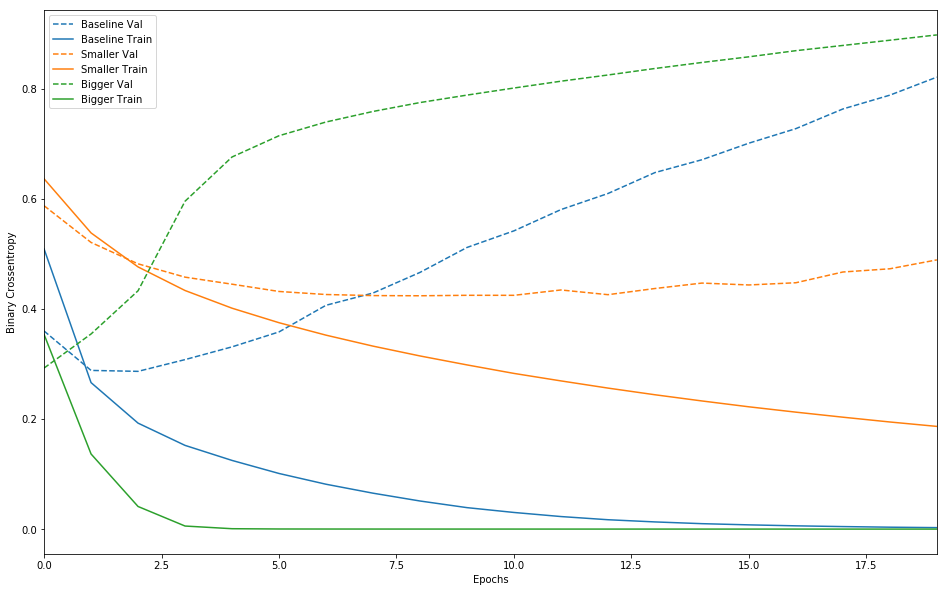

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Weight Regularization
Force the weights of the network to have only small numbers, limiting the entropy and preventing overfitting.

* L1 regularization, where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* L2 regularization, where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

Network with l2

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5331 - acc: 0.7829 - binary_crossentropy: 0.4954 - val_loss: 0.3698 - val_acc: 0.8770 - val_binary_crossentropy: 0.3313
Epoch 2/20
 - 4s - loss: 0.2934 - acc: 0.9111 - binary_crossentropy: 0.2512 - val_loss: 0.3289 - val_acc: 0.8881 - val_binary_crossentropy: 0.2839
Epoch 3/20
 - 4s - loss: 0.2421 - acc: 0.9320 - binary_crossentropy: 0.1948 - val_loss: 0.3340 - val_acc: 0.8862 - val_binary_crossentropy: 0.2849
Epoch 4/20
 - 4s - loss: 0.2167 - acc: 0.9437 - binary_crossentropy: 0.1659 - val_loss: 0.3502 - val_acc: 0.8810 - val_binary_crossentropy: 0.2981
Epoch 5/20
 - 4s - loss: 0.2036 - acc: 0.9500 - binary_crossentropy: 0.1499 - val_loss: 0.3649 - val_acc: 0.8782 - val_binary_crossentropy: 0.3101
Epoch 6/20
 - 4s - loss: 0.1903 - acc: 0.9544 - binary_crossentropy: 0.1348 - val_loss: 0.3834 - val_acc: 0.8744 - val_binary_crossentropy: 0.3273
Epoch 7/20
 - 4s - loss: 0.1833 - acc: 0.9584 - binary_crossentropy:

l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value**2 to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

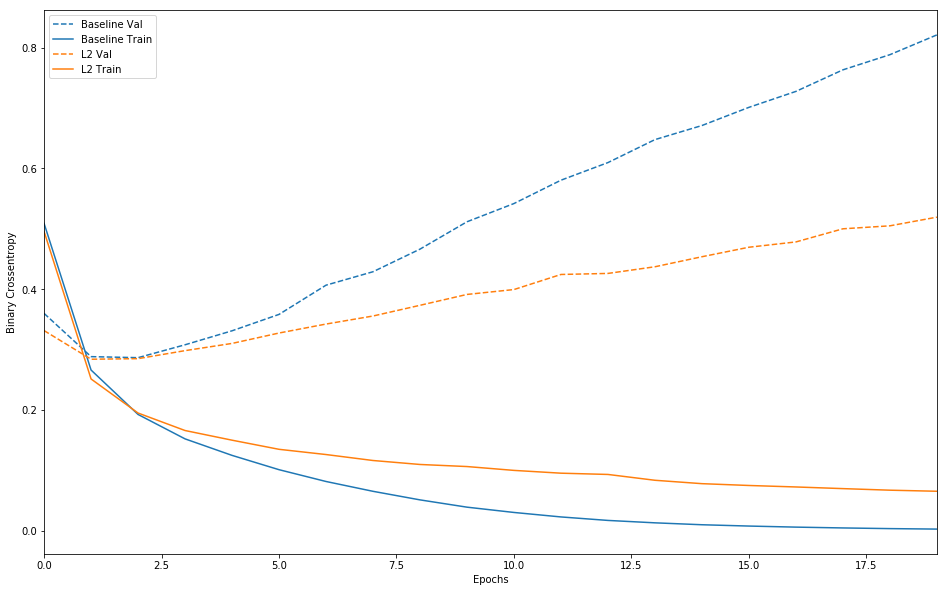

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])